Polygon
Polygon
Polygon
Circle
Polygon
Triangle
Polygon
Polygon
Polygon
Polygon
Polygon
Square
Polygon
Polygon
Polygon
Circle
Polygon
Polygon
Polygon
Square
Square
Polygon
Polygon
Triangle
Square
Polygon
Circle
Polygon
Polygon
Circle
Square
Polygon
Polygon
Square
Polygon
Polygon
Square
Polygon
Polygon
Polygon
Circle
Polygon
Square
Square
Polygon
Polygon
Triangle
Square
Circle
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Circle
Triangle
Circle
Circle
Polygon
Triangle
Circle
Polygon
Circle
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Circle
Polygon
Square
Circle
Square
Polygon
Square
Square
Circle
Polygon
Polygon
Circle
Circle
Polygon
Polygon
Polygon
Square
Circle
Square
Triangle
Square
Polygon
Polygon
Polygon
Polygon
Square
Polygon
Polygon
Square
Triangle
Polygon
Polygon
Polygon
Circle
Triangle
Square
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Square
Square
Polygon
Polygon
Polygon
Polygon
Polygon
Square
Polygon
Polygon
Polygon
Polygon
Square
Polygon
Polygon
Sq

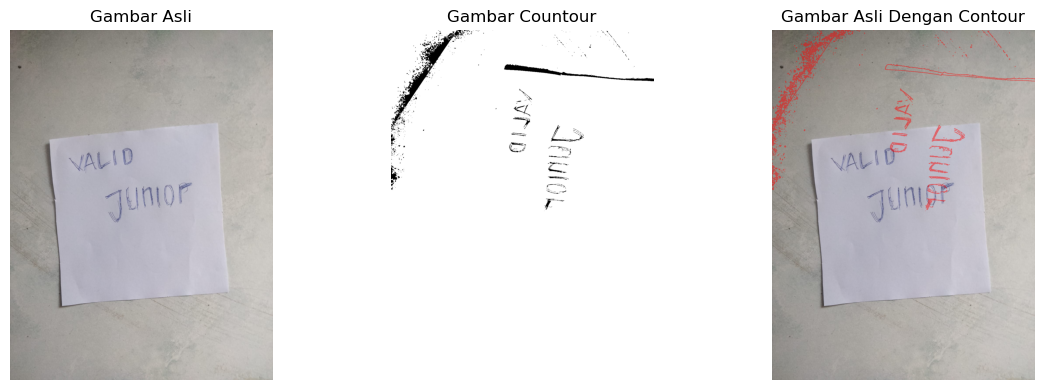

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def detect_shapes(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    shapes = []

    for contour in contours:
        num_corners = len(contour)
        if num_corners >= 8 and num_corners <= 23:
            shapes.append("Circle")
        elif num_corners == 3:
            shapes.append("Triangle")    
        elif num_corners == 4:
            shapes.append("Square" if cv2.isContourConvex(contour) else "Rectangle")       
        else:
            shapes.append("Polygon")
    
    return shapes

image_path = 'gambar.jpg'
detected_shapes = detect_shapes(image_path)

for shape in detected_shapes:
    print(shape)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours = measure.find_contours(thresh, 0.5)

image_with_contour_pattern = np.ones_like(image) * 255
for contour in contours:
    contour = np.around(contour).astype(np.int32)
    cv2.drawContours(image_with_contour_pattern, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)

image_with_contour = np.copy(image)
for contour in contours:
    contour = np.around(contour).astype(np.int32)
    cv2.polylines(image_with_contour, [contour], True, (255, 0, 0), thickness=2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title('Gambar Asli')
axes[0].axis('off')
axes[1].imshow(image_with_contour_pattern, cmap='gray')
axes[1].set_title('Gambar Countour')
axes[1].axis('off')
axes[2].imshow(image)
axes[2].imshow(image_with_contour, alpha=0.5)
axes[2].set_title('Gambar Asli Dengan Contour')
axes[2].axis('off')
plt.tight_layout()
plt.show()